In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\canconsin.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y=df.iloc[:,1].values  #target

In [5]:
x=df.iloc[:,2:].values #ft

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
#B,M -> 0,1

y=encoder.fit_transform(y)

In [8]:
encoder.classes_

array(['B', 'M'], dtype=object)

In [9]:
encoder.transform(['B','M'])

array([0, 1], dtype=int64)

In [10]:
#dimensione dataset per impostare test size di train_test_split

df.size

18208

In [11]:
from sklearn.model_selection import train_test_split as split

In [12]:
#divido il dataset in train e test

xtr,xts,ytr,yts=split(x,y,test_size=0.2,random_state=1,stratify=y)

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
from sklearn.model_selection import cross_val_score
cvs=cross_val_score
import numpy as np

In [14]:
#accuratezza albero decisionale

np.mean(cvs(forest,xtr,ytr))

0.9626373626373625

In [15]:
#accuratezza albero decisionale +/-

np.std(cvs(forest,xtr,ytr))

0.016150481820548422

In [16]:
#imposto albero decisionale per individuare colonne determinanti per predire y

forest.fit(xtr,ytr)

ft=df.iloc[:,2:].columns

pd.DataFrame({'ft':ft,'imp':forest.feature_importances_}).sort_values('imp',ascending=False).head(10)

,ft,imp
22,24,0.172928
7,9,0.133573
23,25,0.121379
20,22,0.095049
27,29,0.092930
13,15,0.053834
3,5,0.046636
0,2,0.032607
2,4,0.032470
6,8,0.030311


In [17]:
#imposto nuova x con colonne più determinanti

ft=['22','29','24','9']
x=df[ft].values
xtr,xts,ytr,ts=split(x,y,test_size=0.2,random_state=1,stratify=y)

In [18]:
from sklearn.pipeline import make_pipeline

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [20]:
#scalo x e imposto regressione con pipeline

pipelog=make_pipeline(StandardScaler(),LogisticRegression(random_state=1))

In [21]:
pipelog.fit(xtr,ytr)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [22]:
#accuratezza

np.mean(cvs(pipelog,xtr,ytr))

0.9362637362637363

In [23]:
#o senza pipeline

scaler=StandardScaler()

In [24]:
xtrs,xtss=scaler.fit_transform(xtr),scaler.transform(xts)

In [25]:
logreg=LogisticRegression(random_state=1)

In [26]:
logreg.fit(xtrs,ytr)

LogisticRegression(random_state=1)

In [27]:
np.mean(cvs(logreg,xtrs,ytr))

0.9362637362637363

# Learning, Validation curve

In [28]:
from sklearn.model_selection import learning_curve,validation_curve

In [29]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

### Learning curve

In [30]:
#imposto learning curve

train_sz,train_sc,test_sc=learning_curve(logreg,xtrs,ytr)

In [31]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=train_sz,
                        y=np.mean(train_sc,axis=1),
                        name='training accuracy',
                        marker_color='blue'))
fig.add_trace(go.Scatter(x=train_sz,
                        y=np.mean(train_sc,axis=1)+np.std(train_sc,axis=1),
                        marker_color='cyan',fill='tonexty',
                        name='mean+std'))
fig.add_trace(go.Scatter(x=train_sz,
                        y=np.mean(train_sc,axis=1)-np.std(train_sc,axis=1),
                        marker_color='cyan',fill='tonexty',
                        name='mean-std'))
fig.add_trace(go.Scatter(x=train_sz,
                        y=np.mean(test_sc,axis=1),
                        name='validation accuracy',
                        marker_color='orangered'))
fig.add_trace(go.Scatter(x=train_sz,
                        y=np.mean(test_sc,axis=1)+np.std(test_sc,axis=1),
                        marker_color='gold',fill='tonexty',
                        name='mean+std'))
fig.add_trace(go.Scatter(x=train_sz,
                        y=np.mean(test_sc,axis=1)-np.std(test_sc,axis=1),
                        marker_color='gold',fill='tonexty',
                        name='mean-std'))
fig.update_layout(title='learning curve',
                 xaxis_title='training examples',
                 yaxis_title='accuracy',
                 plot_bgcolor='white')
fig.update_xaxes(gridcolor='lightgrey',linecolor='grey')
fig.update_yaxes(gridcolor='lightgrey',linecolor='grey')
fig.show()

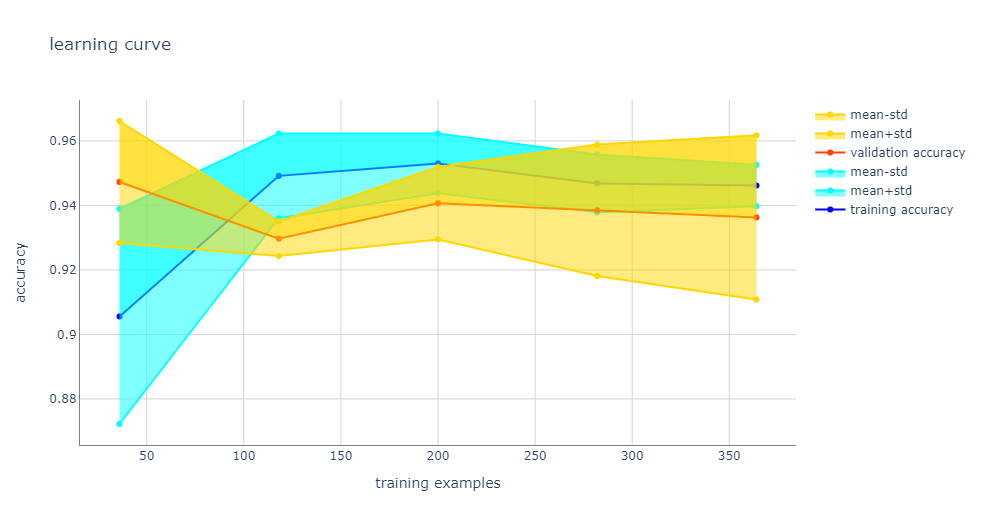

In [32]:
#servono almeno 280 esempi

### Validation curve

In [35]:
# parametri di logreg

logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
#imposto validation curve e parametro logreg

train_scores,test_scores=validation_curve(logreg,xtrs,ytr,param_name='C',param_range=[1,10,20,30,40,50,60,70,80,90,100])

In [38]:
param_range=[1,10,20,30,40,50,60,70,80,90,100]

fig=go.Figure()
fig.add_trace(go.Scatter(x=param_range,
                       y=np.mean(train_scores,axis=1),
                       name='training accuracy',
                       marker_color='blue'))
fig.add_trace(go.Scatter(x=param_range,
                        y=np.mean(test_scores,axis=1),
                        name='validation accuracy',
                        marker_color='orangered'))
fig.add_trace(go.Scatter(x=param_range,
                        y=np.mean(train_scores,axis=1)+np.std(train_scores,axis=1),
                        marker_color='cyan',fill='tonexty',
                        name='mean+std'))
fig.add_trace(go.Scatter(x=param_range,
                        y=np.mean(train_scores,axis=1)-np.std(train_scores,axis=1),
                        marker_color='cyan',fill='tonexty',
                        name='mean-std'))
fig.add_trace(go.Scatter(x=param_range,
                        y=np.mean(test_scores,axis=1)+np.std(test_scores,axis=1),
                        marker_color='gold',fill='tonexty',
                        name='mean+std'))
fig.add_trace(go.Scatter(x=param_range,
                        y=np.mean(test_scores,axis=1)-np.std(test_scores,axis=1),
                        marker_color='gold',fill='tonexty',
                        name='mean-std'))
fig.update_layout(title='validation curve',
                 plot_bgcolor='white',
                 xaxis_title='C',
                 yaxis_title='accuracy')
fig.update_xaxes(gridcolor='lightgrey',linecolor='grey')
fig.update_yaxes(gridcolor='lightgrey',linecolor='grey')
fig.show()

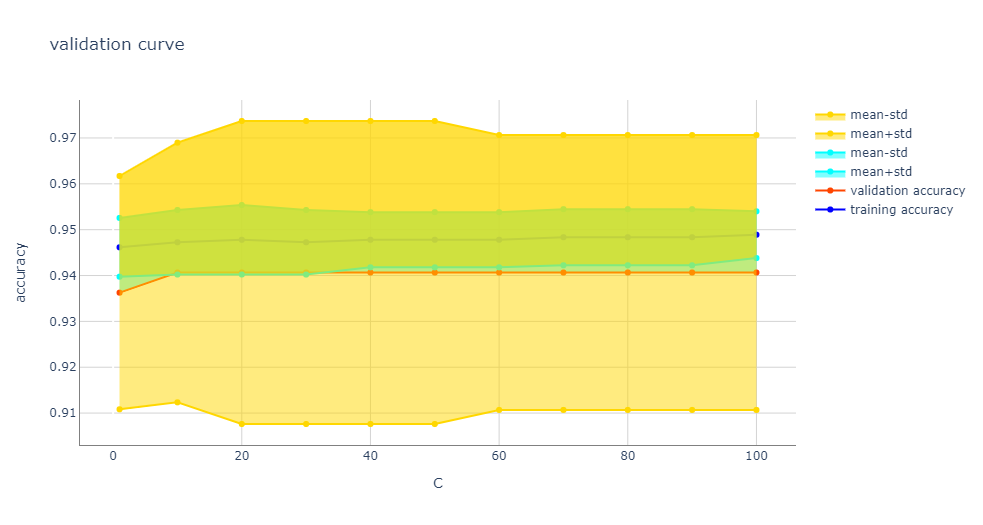

In [39]:
#miglior C=10

#### esiste un modo più veloce:

# GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid={'C':[1,10,20,30,40,50,60,70,80,90,100]}
gs=GridSearchCV(logreg,param_grid)

In [42]:
gs.fit(xtrs,ytr)

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

In [43]:
gs.best_score_

0.9406593406593406

In [44]:
gs.best_params_

{'C': 10}

In [46]:
#convalida incrociata di griglia

np.mean(cvs(gs,xtrs,ytr)), 'accuracy'

(0.9384615384615385, 'accuracy')

In [47]:
np.std(cvs(gs,xtrs,ytr)), '+/-'

(0.02563055777953977, '+/-')

In [50]:
r=[]
a=[]
for k in range(1,100,10):
    logreg=LogisticRegression(C=k,max_iter=200)
    logreg.fit(xtrs,ytr)
    a1=np.mean(cvs(logreg,xtrs,ytr))
    a.append(a1)
    r.append(k)

In [68]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=r,y=a,marker_color='steelblue'))
fig.update_layout(title=dict(text='best C',font_color='darkcyan') ,plot_bgcolor='white',
                 xaxis=dict(title='C',title_font={'color':'darkcyan'}),
                 yaxis=dict(title='accuracy',title_font={'color':'darkcyan'}))
fig.update_xaxes(gridcolor='lightgrey',linecolor='grey')
fig.update_yaxes(gridcolor='lightgrey',linecolor='grey')
fig.show()

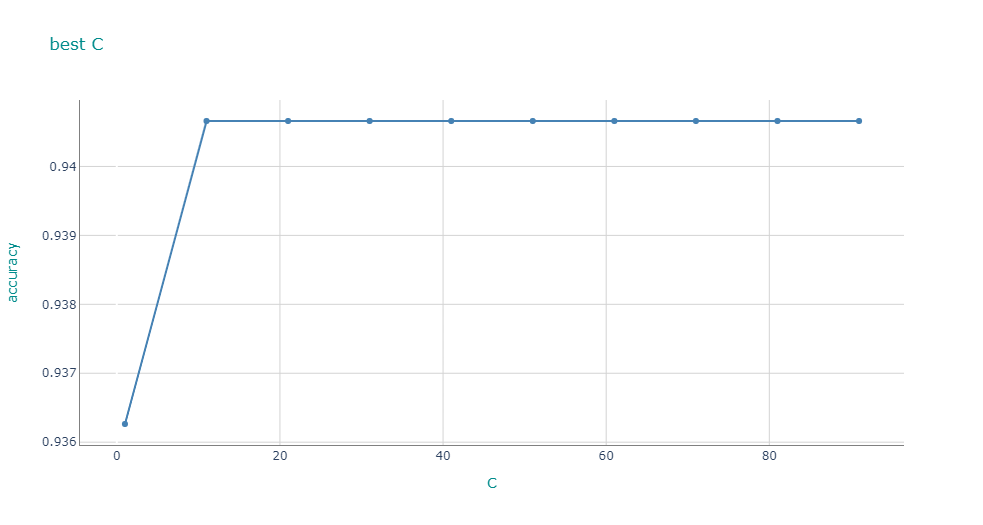